In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
import datetime
import xarray as xr
from scipy.optimize import curve_fit
import pandas as pd
from zarr import Blosc
from functions import *

START = 1577893961
END = 1633042861

In [4]:
data = xr.open_zarr("/home/grp3/gil/merged/HEPP_H.zarr.zip")
data = drop_unwanted_data(data, START)
range_data = drop_unwanted_data(data, end=END)
data = data.sortby("TIME")
arr = block_coordinates(data)
range_arr = block_coordinates(range_data)

In [5]:
data

<xarray.Dataset> Size: 187MB
Dimensions:         (ID: 379555)
Coordinates:
  * ID              (ID) int64 3MB 18092 18093 18094 ... 397644 397645 397646
Data variables: (12/62)
    A411_0_0        (ID) float64 3MB 0.0 0.0 0.0 ... 7.426e-05 0.0005721
    A411_0_1        (ID) float64 3MB 0.0 0.0 0.0 ... 8.699e-05 0.0009358
    A411_0_2        (ID) float64 3MB 0.0 0.0 0.0 ... 0.0001474 0.001623
    A411_0_3        (ID) float64 3MB 0.001099 0.001984 ... 0.0001726 0.001294
    A411_0_4        (ID) float64 3MB 0.003537 0.006523 ... 0.0001847 0.0009871
    A411_0_5        (ID) float64 3MB 0.001694 0.003205 ... 4.787e-06 7.96e-06
    ...              ...
    Block_y         (ID) float64 3MB 1.0 1.0 1.0 1.0 2.0 ... 7.0 8.0 8.0 8.0 8.0
    Count_Electron  (ID) float64 3MB 136.0 204.0 236.0 259.0 ... 16.0 20.0 143.0
    Count_Proton    (ID) float64 3MB 1.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    GEO_LAT         (ID) float32 2MB -67.3 -63.72 -60.1 ... 59.65 63.3 66.9
    GEO_LON         (ID) float32 2MB 27.01 23.9 21.44 ... 32.99 30.55 27.48
    TIME            (ID) float64 3MB 1.609e+09 1.609e+09 ... 1.673e+09 1.673e+09

In [ ]:
# A411, A412, Count_Electron, Count_Proton

In [7]:
# block = arr[5][5]
# time = data["TIME"][block].data
# count = data["A411_0_0"][block].data
# resampled_time, resampled_counts = resample(time, count, "1d")

# plt.figure(figsize=(15, 5))
# plt.scatter(resampled_time, resampled_counts, s=3)
# plt.title("A411_0_0 spectrum in block 5,5 before background subtraction")
# plt.xlabel("Time")
# plt.ylabel("Spectrum")
# plt.show()

In [6]:
# A411

meadium_spectra_411 = meadium_spectra(range_data, range_arr, "A411_")
subtract_medium_spectra(data, arr, meadium_spectra_411, "A411_")

In [8]:
# block = arr[5][5]
# time = data["TIME"][block].data
# count = data["A411_0_0"][block].data
# resampled_time, resampled_counts = resample(time, count, "1d")

# plt.figure(figsize=(15, 5))
# plt.scatter(resampled_time, resampled_counts, s=3)
# plt.title("A411_0_0 spectrum in block 5,5 after background subtraction")
# plt.xlabel("Time")
# plt.ylabel("Spectrum")
# plt.show()

In [7]:
# A412

meadium_spectra_412 = meadium_spectra(range_data, range_arr, "A412_")
subtract_medium_spectra(data, arr, meadium_spectra_412, "A412_")

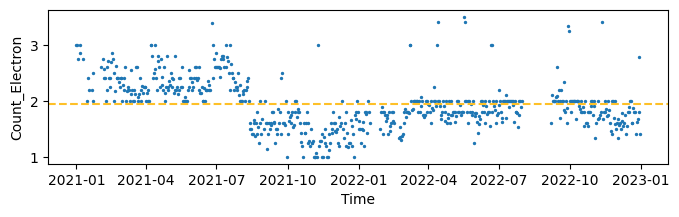

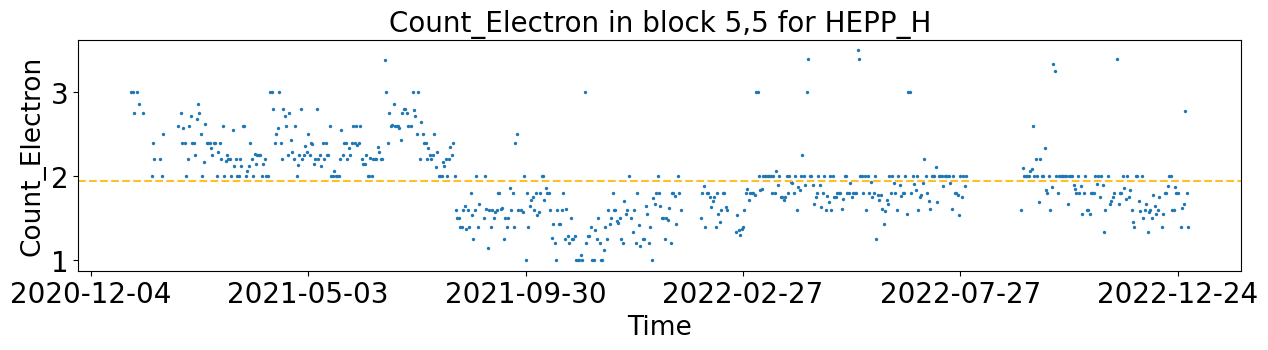

In [40]:
block = arr[5][5]

resampled_time, resampled_counts = resample(data["TIME"][block].data, data["Count_Electron"][block].data, "1d")

plt.figure(figsize=(8, 2))
plt.scatter(resampled_time, resampled_counts, s=2)
plt.axhline(np.mean(resampled_counts), color='#fec028', linestyle='--')
plt.xlabel("Time")
plt.ylabel("Count_Electron")
plt.show()

####

plt.figure(figsize=(15, 3))
plt.scatter(resampled_time, resampled_counts, s=2)
plt.axhline(np.mean(resampled_counts), color='#fec028', linestyle='--')
plt.title("Count_Electron in block 5,5 for HEPP_H", size=20)
plt.xlabel("Time", size=19)
plt.ylabel("Count_Electron", size=19)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(6))
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(3))
plt.show()


In [41]:
# # Count_Electron

# mean_electrons = count_bg(range_data, range_arr, "Count_Electron")
# subtract_count_bg(data, arr, mean_electrons, "Count_Electron")

mean_electrons = count_bg(data, arr, "Count_Electron")
subtract_count_bg(data, arr, mean_electrons, "Count_Electron")

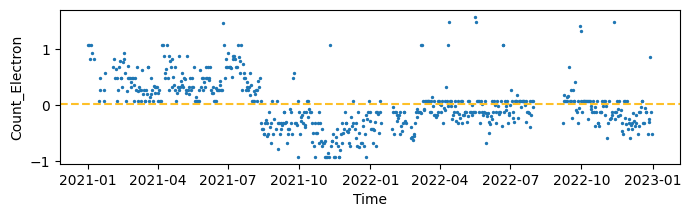

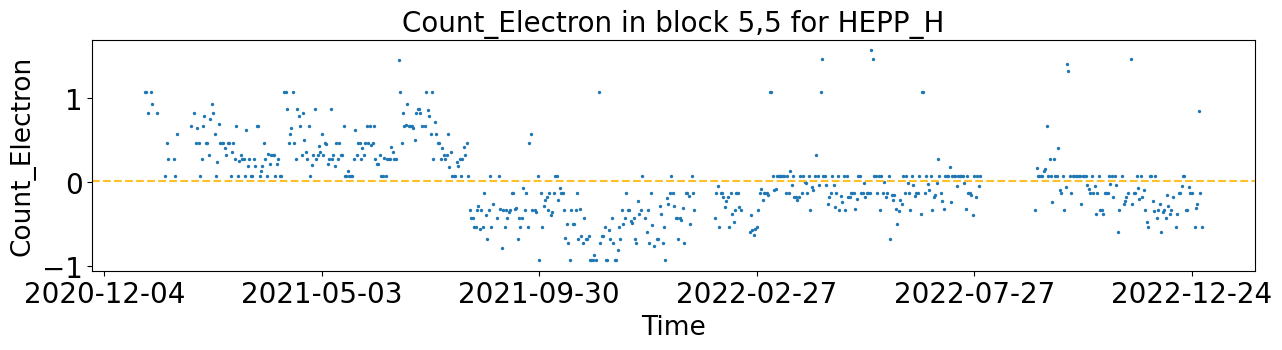

In [42]:
block = arr[5][5]

resampled_time, resampled_counts = resample(data["TIME"][block].data, data["Count_Electron"][block].data, "1d")

plt.figure(figsize=(8, 2))
plt.scatter(resampled_time, resampled_counts, s=2)
plt.axhline(np.mean(resampled_counts), color='#fec028', linestyle='--')
plt.xlabel("Time")
plt.ylabel("Count_Electron")
plt.show()

plt.figure(figsize=(15, 3))
plt.scatter(resampled_time, resampled_counts, s=2)
plt.axhline(np.mean(resampled_counts), color='#fec028', linestyle='--')
plt.title("Count_Electron in block 5,5 for HEPP_H", size=20)
plt.xlabel("Time", size=19)
plt.ylabel("Count_Electron", size=19)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(6))
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(3))
plt.show()

In [10]:
# Count_Proton

mean_protons = count_bg(range_data, range_arr, "Count_Proton")
subtract_count_bg(data, arr, mean_protons, "Count_Proton")

In [11]:
write_to_zarr(data, "/home/grp3/rm_bg_4months/HEPP_H.zarr.zip")